#  <center> 第一部分 Explore</center >
# 1 Data Visiualization with _ggplot2_
## 1.1 以mpg数据为例
* mpg数据：可以通过 _str(mpg)_ 以及 _?mpg_ 加以了解
* creating a ggplot
```R
  # library(tidyverse)
  ggplot(data=mpg)+geom_point(mapping=aes(x=displ,y=hwy)) 
  # 或者也可以不要写出mapping：
  # ggplot(data=mpg)+geom_point(aes(x=displ,y=hwy))
```
* 模板
```R
  ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

## 1.2 设置mapping/ aesthetic mapping
* Aesthetics include things like the size, the shape, or the color of your points. For example, you can map the colors of your points to the class variable to reveal the class of each car. 
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, color = class))
```
* To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside ___aes()___. ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as ___scaling___. ggplot2 will also add a legend that explains which levels correspond to which values.
* In the preceding example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because __mapping an unordered variable (class) to an ordered aesthetic (size) is not a good idea__:
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, size = class)) # 此处class是一个categorical variable
    #> Warning: Using size for a discrete variable is not advised.
```
  - 不过，可以将class用作控制透明度(transparency)的变量，或者是点的形状
  ```R
    # 控制透明度(alpha=) 
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, alpha = class))
    # 控制点的形状(shape=)
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, shape = class)) # 由于ggplot2一次只能使用6个形状，因而排在最后的SUV无法标注
  ```
  
## 1.3 common problems
* One common problem when creating ggplot2 graphics is to put the + in the wrong place: it has to come at the end of the line, not the start.

## 1.4 Facets
* One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.To facet your plot by a single variable, use ___facet_wrap()___. The first argument of facet_wrap() should be a formula, which you create with ~ followed by a variable name (here “formula” is the name of a data structure in R, not a synonym for “equation”). The variable that you pass to facet_wrap() should be discrete:
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_wrap(~ class, nrow = 2)
```

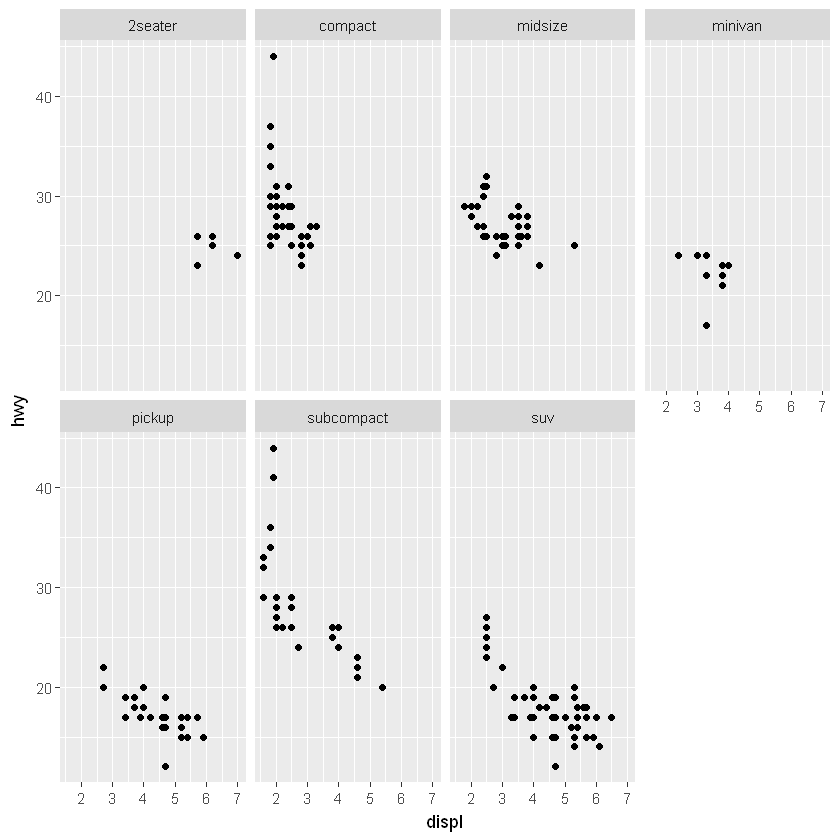

In [26]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ class, nrow = 2)

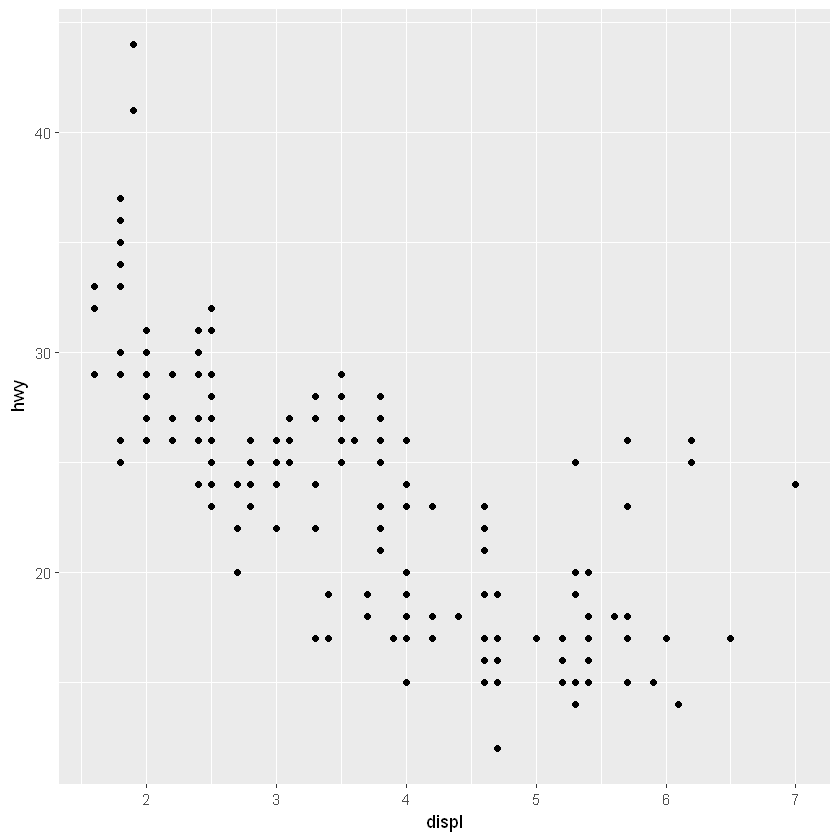

#  <center> 第二部分 Wrangle</center >
# 7 Tibbles with tibble
## 7.1 Creating Tibbles
* __as_tibble()__
```R
 library(tidyverse)
 as_tibble(iris)
```
* __tibble()__
```R
 tibble(
     x= 1:5,
     y=1, # 自动填充成5个1
     z=x^2+y
     )
```
  * It’s possible for a tibble to have column names that are not valid R variable names, aka ___nonsyntactic___ names.
  ```R
    tb <- tibble(
      `:)` = "smile",
      ` ` = "space",
      `2000` = "number"
    )
    tb
```
* __tribble()__: transposed tibble
```R
    tribble(
      ~x, ~y, ~z,
      #--|--|----
      "a", 2, 3.6,
      "b", 1, 8.5
    )
```
## 7.2 Tibbles Versus data.frame
二者在使用时，主要有两种差别：printing和subsetting
* printing
```R
  tibble(
    a = lubridate::now() + runif(1e3) * 86400,
    b = lubridate::today() + runif(1e3) * 30,
    c = 1:1e3,
    d = runif(1e3),
    e = sample(letters, 1e3, replace = TRUE)
  )
```

In [1]:
 library(tidyverse)
a<-tibble(
  a = lubridate::now() + runif(1e3) * 86400,
  b = lubridate::today() + runif(1e3) * 30,
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.8.0     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
options(tibbles.print_max=15)
print(a)

# A tibble: 1,000 x 5
   a                   b              c      d e    
   <dttm>              <date>     <int>  <dbl> <chr>
 1 2018-02-22 02:25:59 2018-02-24     1 0.638  n    
 2 2018-02-22 17:10:57 2018-03-13     2 0.932  y    
 3 2018-02-22 07:52:18 2018-03-05     3 0.286  n    
 4 2018-02-22 13:04:56 2018-03-09     4 0.634  j    
 5 2018-02-21 23:43:28 2018-03-17     5 0.514  d    
 6 2018-02-22 04:17:18 2018-03-14     6 0.0671 a    
 7 2018-02-21 23:48:42 2018-03-18     7 0.790  n    
 8 2018-02-22 02:18:19 2018-03-17     8 0.999  v    
 9 2018-02-22 15:36:39 2018-03-15     9 0.188  d    
10 2018-02-22 10:25:14 2018-02-24    10 0.796  c    
# ... with 990 more rows
